/Users/eunsunlee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


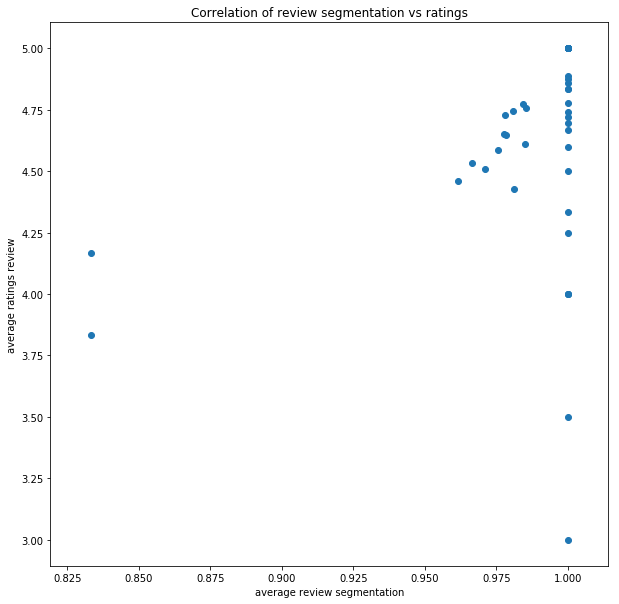

In [2]:
from preprocess_data import *
from classifier import *
import pandas as pd
from matplotlib import pyplot as plt


# Segmentation function that trains input data using naive bayes algorithm
# Input: path to the data for segmentation
# Output: counter object and naive bayes model used for training
def segmentation(segmentation_data, num_size=100000):
    data = load_gz_file(segmentation_data, num_size)
    train_data, test_data, train_labels, test_labels = preprocess(data,3)
    counter, model = naive_bayes(train_data,train_labels)
    acc = validate_naive_bayes(counter, model, test_data, test_labels)
    return counter, model

# For each product in Amazon data, predict the segmentation of each review and correlate the average review
# with the average of actual rating that the reviewers have given
# Input: Amazon dataset that contains review information for each product, naive bayes model, counter object
# Output: lists of average review segmentation and average ratings
def correlate(review_data, model, counter):
    df = pd.read_csv(review_data)
    review_per_item = df.groupby('name')[['reviews.rating', 'reviews.text']].apply(lambda g: g.values.tolist()).to_dict()
    ratings_list = []
    reviews_list = []
    for item in review_per_item:
        product_ratings=np.array(review_per_item[item])[:,0].astype(float)
        product_reviews=np.array(review_per_item[item])[:,1]
        review_pos_neg = predict_naive_bayes(counter, model, product_reviews)
        avg_product_rating = np.sum(product_ratings) / (len(product_ratings))
        avg_product_review = np.sum(review_pos_neg)/len(review_pos_neg)
        ratings_list.append(avg_product_rating)
        reviews_list.append(avg_product_review)
    return ratings_list, reviews_list

if __name__ == '__main__':
    segmentation_data = "data/reviews_Electronics_5.json.gz"
    counter, model = segmentation(segmentation_data)
    review_data = "data/1429_1.csv"
    ratings_list, reviews_list = correlate(review_data, model, counter)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(reviews_list, ratings_list)
    ax.set_title("Correlation of review segmentation vs ratings")
    ax.set_xlabel("average review segmentation")
    ax.set_ylabel("average ratings review")
    plt.savefig ("correlation.png") 
    plt.show ()
    
